In [46]:
from tensorflow.keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

CRIM     per capita crime rate by town  
 ZN       proportion of residential land   zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town  
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
 NOX      nitric oxides concentration (parts per 10 million)  
 RM       average number of rooms per dwelling  
 AGE      proportion of owner-occupied units built prior to 1940  
 DIS      weighted distances to five Boston employment centres  
 RAD      index of accessibility to radial highways  
 TAX      full-value property-tax rate per $10,000 
 PTRATIO  pupil-teacher ratio by town  
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
 LSTAT    % lower status of the population  
 MEDV     Median value of owner-occupied homes in $1000's

In [47]:
print(type(x_train))
print(x_train[0])
print(len(x_train), len(y_train), len(x_test), len(y_test))

<class 'numpy.ndarray'>
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
404 404 102 102


In [48]:
#정규화를 꼭 하자
x_mean = x_train.mean(axis=0)
x_std = x_train.std(axis=0)

x_train -= x_mean
x_train /= x_std
x_test -= x_mean
x_test /= x_std

y_mean = y_train.mean(axis=0)
y_std = y_train.std(axis=0)

y_train -= y_mean
y_train /= y_std
y_test -= y_mean
y_test /= y_std

print(x_mean)
print(x_std)

[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]
[9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]


In [49]:
import tensorflow as tf

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 52, activation='elu' ,input_shape=(13,)),
    tf.keras.layers.Dense(units = 39, activation='elu'),
    tf.keras.layers.Dense(units = 26, activation='elu'),
    tf.keras.layers.Dense(units = 1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.07),
              loss='mse')

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 52)                728       
_________________________________________________________________
dense_17 (Dense)             (None, 39)                2067      
_________________________________________________________________
dense_18 (Dense)             (None, 26)                1040      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [59]:
# 중간에 학습을 종료, 단 좋은 결과가 나왔을 경우에!
callback = tf.keras.callbacks.EarlyStopping(monitor='valloss', patience=3)
history = model.fit(x_train, y_train, epochs=50, batch_size=32,
                    callbacks = [callback],
                    validation_split=0.25)

Epoch 1/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0947 - val_loss: 0.2382
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1041 - val_loss: 0.2100
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1158 - val_loss: 0.2378
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0953 - val_loss: 0.1960
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0852 - val_loss: 0.2225
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1043 - val_loss: 0.2070
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1107 - val_loss: 0.2365
Epoch 8/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1084 - val_loss: 0.2301
Epoch 9/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1477 - val_loss: 0.2459
Epoch 10/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1251 - val_loss: 0.2550
Epoch 11/50
10/10 [

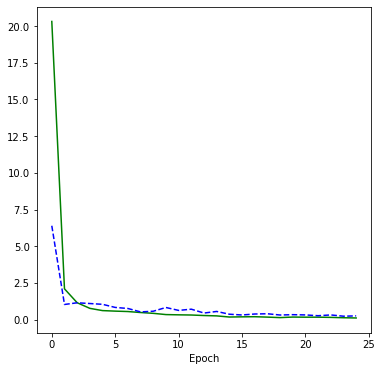

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot(history.history['loss'], 'g-', label = 'loss')
plt.plot(history.history['val_loss'], 'b--', label = 'val_loss')
plt.xlabel('Epoch')
plt.show()

In [53]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.4143


0.41426536440849304

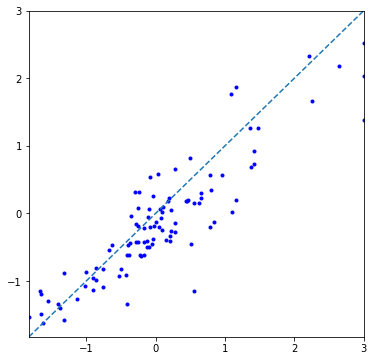

In [54]:
y_hat = model.predict(x_test)
plt.figure(figsize=(6,6))
plt.plot(y_test, y_hat, 'b.')
plt.axis([min(y_test), max(y_test),min(y_test),max(y_test)])
plt.plot([min(y_test), max(y_test)],[min(y_test),max(y_test)],'--')
plt.show()

# 활성함수 비교
sigmoid
tanh
relu

In [55]:
import numpy as np
import math

def sigmoid(x):
  return 1 / (1+math.exp(-x))

x = np.arange(-5, 5, 0.01)

sigmoid = [sigmoid(z) for z in x]
relu = [ 0 if z < 0 else z for z in x]
print(relu)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

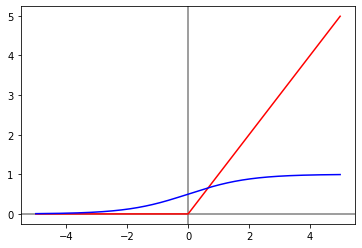

In [56]:
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, relu, 'r', label = 'relu')
plt.plot(x, sigmoid, 'b', label = 'sigmoid')
plt.show()